In [1]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
from numpy import ndarray
%matplotlib inline

In [2]:
# Размер выборок.
N = 1000

Функция выполняющая эксперимент.
Принимает на вход параметры распределения, функции подсчета распределений, оценки методом моментов и максимального правдоподобия, размер выборки и количество бутстрепных выборок.

In [3]:
# Будем использовать K=100, т.к. если K = 1000, то слишком долго ждать.
def solve_task(theta, destribution, moment_evaluation, credibility_evaluation, N=1000, K=100, ylim=0, realvar=0):
    # Количество параметров распределения.
    theta_len = len(theta)
    # Создание выборки.
    sample = destribution(N, theta)
    # Цикл, просто запускает, поданные в параметрах, функции от среза массива sample[:n].
    # Получаем листы оценок параметров.
    moment_array = list(map(lambda n: moment_evaluation(sample[:n]), range(2, N)))
    credibility_array = list(map(lambda n: credibility_evaluation(sample[:n]), range(2, N)))
    var_mom_par = ndarray(shape=(N-2), dtype=list)
    var_mom_nopar = ndarray(shape=(N-2), dtype=list)
    var_cred_par = ndarray(shape=(N-2), dtype=list)
    var_cred_nopar = ndarray(shape=(N-2), dtype=list)
    # Бутстреп.
    for n in range(N - 2):
        # Нужно K бутстрепных выборок размера n + 2.
        # Создаем массивы для оценок параметров различными способами.
        mom_evaluations_array = np.zeros((2, K, 2))
        cred_evaluations_array = np.zeros((2, K, 2))
        for i in range(K):
            # Параметрический бутстреп.
            # Генерируем бутстрепную выборку.
            sample_mom_par = destribution(n + 2, moment_array[n])
            sample_cred_par = destribution(n + 2, credibility_array[n])
            
            # Непараметрический бутстреп.
            # Генерируем бутстрепную выборку. В комментрариях к задачам было описано как это сделать.
            # Выборка из равномерного распределения.
            uni = stats.randint.rvs(0, n + 2, size = n + 2)
            # Наша выборка размера n+2.
            sample_notpar = [sample[x] for x in uni]
            
            # Для каждой считаем оценку параметров.
            
            mom_evaluations_array[0, i] = moment_evaluation(sample_mom_par) 
            mom_evaluations_array[1, i] = moment_evaluation(sample_notpar)
            cred_evaluations_array[0, i] = credibility_evaluation(sample_cred_par) 
            cred_evaluations_array[1, i] = credibility_evaluation(sample_notpar)
        
        # Подсчет выборочной дисперсии.
        var_mom_par[n] = [np.var(mom_evaluations_array[0][:,i]) for i in range(theta_len)]
        var_mom_nopar[n] = [np.var(mom_evaluations_array[1][:,i]) for i in range(theta_len)]
        var_cred_par[n] = [np.var(cred_evaluations_array[0][:,i]) for i in range(theta_len)]
        var_cred_nopar[n] = [np.var(cred_evaluations_array[1][:,i]) for i in range(theta_len)]     
        
    for i in range(theta_len):
        print("График выборочных дисперсий для параметра ", i)
        
        # График зависимости бутстрепной оценки дисперсии от n.
        plt.figure(figsize=(10, 7))
        plt.xlabel("n")
        n = range(N - 2)
        plt.ylabel(r"Bootstrap estimate of variance")
        plt.plot(n, [j[i] for j in var_mom_par], color='b', label=r"Parametric, the method of moments")
        plt.plot(n, [j[i] for j in var_mom_nopar], color='g', label=r"Nonparametric, the method of moments")
        plt.plot(n, [j[i] for j in var_cred_par], color='r', label=r"Parametric, likehood")
        plt.plot(n, [j[i] for j in var_cred_nopar], color='y', label=r"Nonparametric, likehood")
        plt.title(r'Bootstrap dispersion', fontsize=10)
        if ylim != 0:
            if type(ylim) == float:
                pylab.ylim(0, ylim)
            else:
                pylab.ylim(0, ylim[i])
        if realvar != 0:
            plt.axhline(y=realvar[i], label="real", color = 'black')
            print("Real variance: ", realvar)
        plt.legend(fontsize=10,loc=2)
        plt.show()
        print("Variance estimates on the N-th step: ")
        print("Parametric, the method of moments: ", var_mom_par[N - 3][i])
        print("Nonparametric, the method of moments: ", var_mom_nopar[N - 3][i])
        print("Parametric, likehood: ", var_cred_par[N - 3][i])
        print("Nonparametric, likehood: ", var_cred_nopar[N - 3][i])
        print("  ")

### Нормальное распределение. 
$N(a, \sigma ^ 2)$, Оценки методом моментов: $a ^ * = \bar x ^ 2 $  ${\sigma ^ 2} ^ * = s^2$.
Оценки методом максимального правдоподобия такие же.
Значения $\theta$ указаны при вызовах функции. Для простоты первый параметр $a$ считаем равным 0.

График выборочных дисперсий для параметра  0


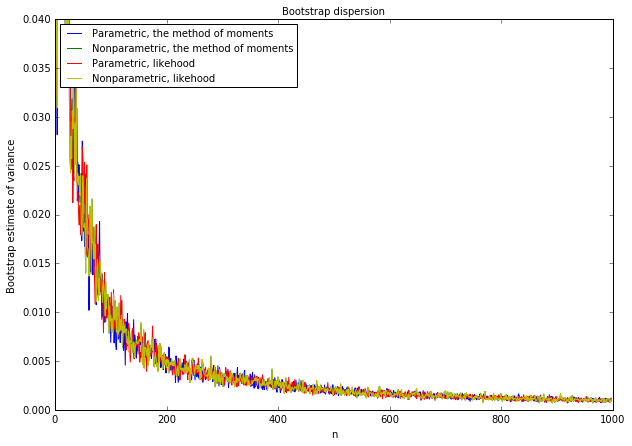

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.00118971389509
Nonparametric, the method of moments:  0.00110134059835
Parametric, likehood:  0.00102257048867
Nonparametric, likehood:  0.00110134059835
  
График выборочных дисперсий для параметра  1


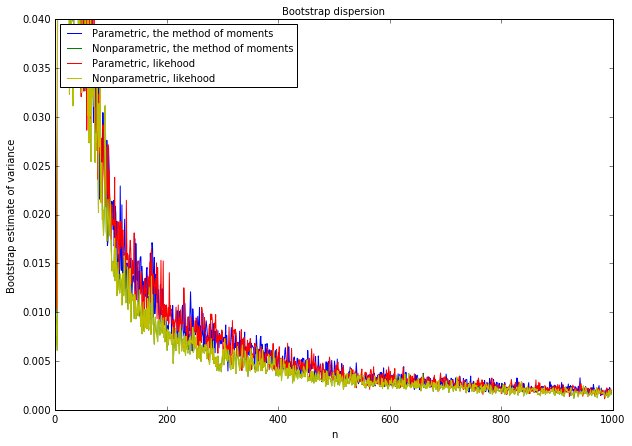

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.00173830085258
Nonparametric, the method of moments:  0.00159854652238
Parametric, likehood:  0.00191701793675
Nonparametric, likehood:  0.00159854652238
  


In [98]:
# Var = 1.
vmp = solve_task(theta = (0, 1), destribution = (lambda N, theta: stats.norm.rvs(size = N, loc = theta[0], scale = theta[1] ** 0.5)),
            moment_evaluation = (lambda x: (np.average(x), stats.moment(x, 2))),
             credibility_evaluation = (lambda x: (np.average(x), stats.moment(x, 2))), ylim=0.04)

График выборочных дисперсий для параметра  0


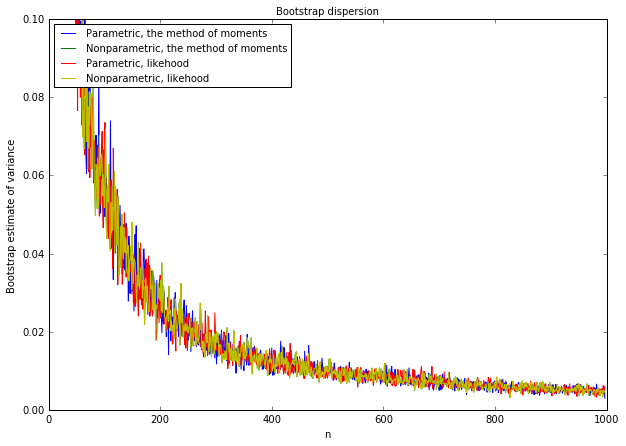

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.00300064410491
Nonparametric, the method of moments:  0.00441100435985
Parametric, likehood:  0.00603688728818
Nonparametric, likehood:  0.00441100435985
  
График выборочных дисперсий для параметра  1


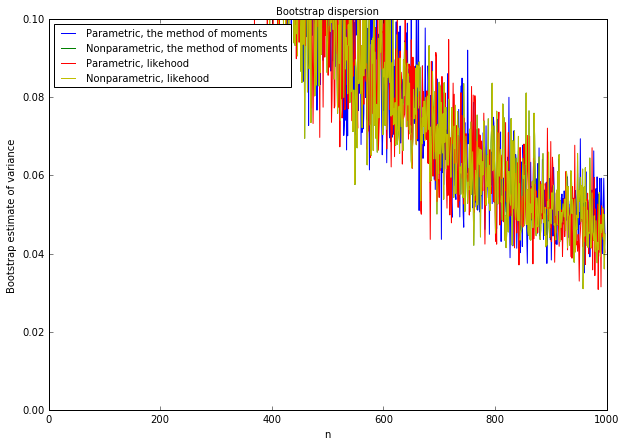

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.0451401483659
Nonparametric, the method of moments:  0.0450024237201
Parametric, likehood:  0.0402998215721
Nonparametric, likehood:  0.0450024237201
  


In [108]:
# Var = 5.
solve_task(theta = (0, 5), destribution = (lambda N, theta: stats.norm.rvs(size = N, loc = theta[0], scale = theta[1] ** 0.5)),
            moment_evaluation = (lambda x: (np.average(x), stats.moment(x, 2))),
             credibility_evaluation = (lambda x: (np.average(x), stats.moment(x, 2))),ylim=0.1)

График выборочных дисперсий для параметра  0


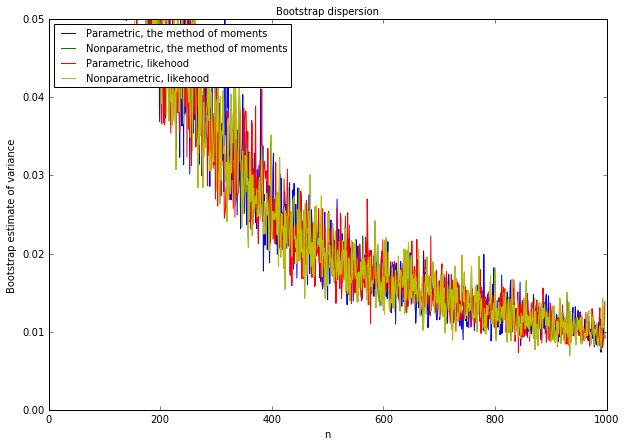

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.00915276178989
Nonparametric, the method of moments:  0.00924991198965
Parametric, likehood:  0.0138663390937
Nonparametric, likehood:  0.00924991198965
  
График выборочных дисперсий для параметра  1


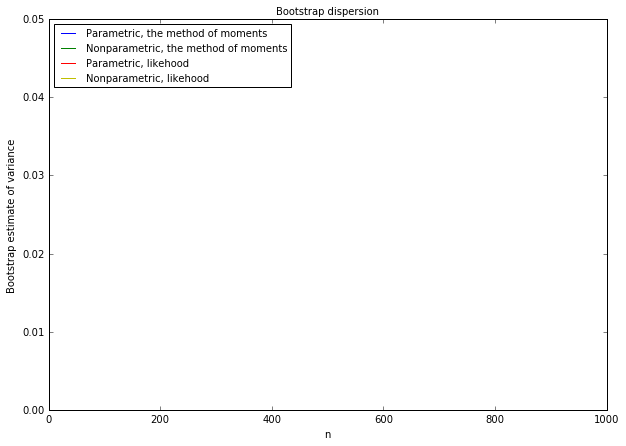

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.24923115031
Nonparametric, the method of moments:  0.194470060918
Parametric, likehood:  0.19806910311
Nonparametric, likehood:  0.194470060918
  


In [104]:
# Var = 10.
solve_task(theta = (0, 10), destribution = (lambda N, theta: stats.norm.rvs(size = N, loc = theta[0], scale = theta[1] ** 0.5)),
            moment_evaluation = (lambda x: (np.average(x), stats.moment(x, 2))),
             credibility_evaluation = (lambda x: (np.average(x), stats.moment(x, 2))),ylim=0.05)

### Гамма распределение.
$Г(\alpha,\gamma)$, Метод моментов: $\alpha * = \frac{(\bar{X})^2}{s^2}$  $\gamma * = \frac{\bar{X}}{s^2}$.
Метод максимального правдоподобия: $\alpha$ фиксированна $\gamma * = \frac{\alpha}{\bar{X}}$

График выборочных дисперсий для параметра  0


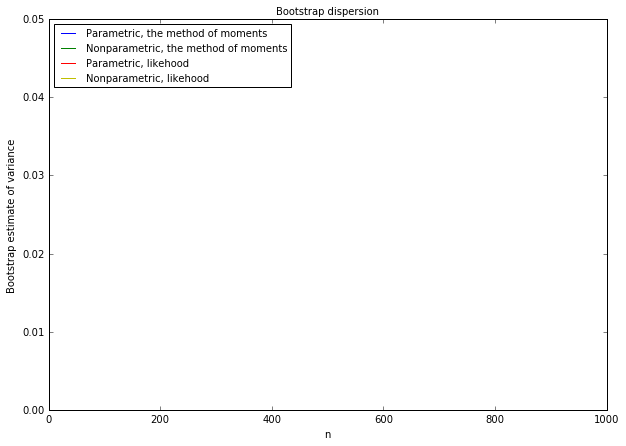

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.0
Nonparametric, the method of moments:  0.0
Parametric, likehood:  0.0
Nonparametric, likehood:  0.0
  
График выборочных дисперсий для параметра  1


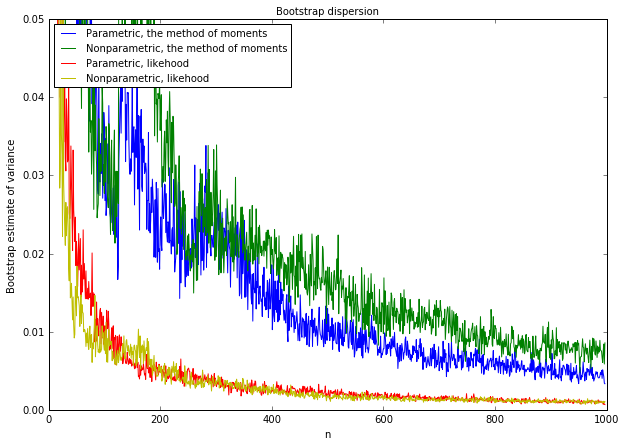

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.00333671539096
Nonparametric, the method of moments:  0.00856307523844
Parametric, likehood:  0.000669375806228
Nonparametric, likehood:  0.00105818401754
  


In [105]:
# alpha = 1, gamma = 1 = 1 / scale
# В библиотеке распределение определено так: gamma.pdf(x, a) = x**(a-1) * exp(-x) / gamma(a)
solve_task(theta = (1, 1), destribution = (lambda N, theta: stats.gamma.rvs(a = theta[0] , size = N, scale = theta[1])),
            moment_evaluation = (lambda x: (stats.moment(x,2) / np.var(x), np.average(x) / np.var(x))),
             credibility_evaluation = (lambda x: (1, 1. / np.average(x))), ylim = 0.05)

График выборочных дисперсий для параметра  0


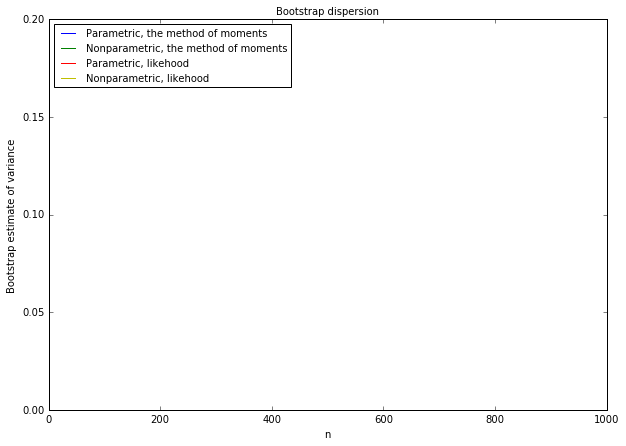

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.0
Nonparametric, the method of moments:  0.0
Parametric, likehood:  0.0
Nonparametric, likehood:  0.0
  
График выборочных дисперсий для параметра  1


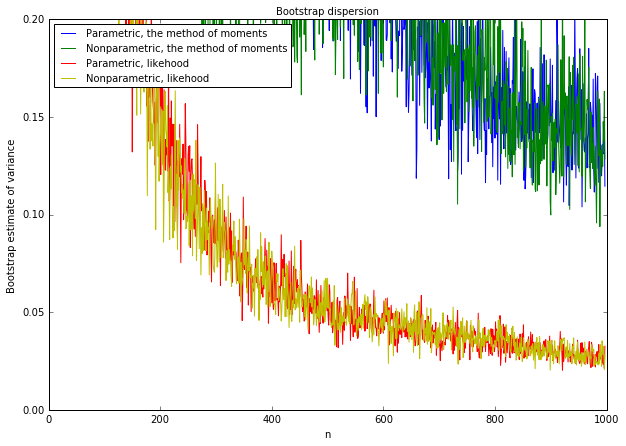

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.114478832464
Nonparametric, the method of moments:  0.12848595093
Parametric, likehood:  0.0325968392125
Nonparametric, likehood:  0.0279090571304
  


In [114]:
# alpha = 1, gamma = 5 = 1 / scale
# В библиотеке распределение определено так: gamma.pdf(x, a) = x**(a-1) * exp(-x) / gamma(a)
solve_task(theta = (1.0, 5.0), destribution = (lambda N, theta: stats.gamma.rvs(a = theta[0] , size = N, scale = 1.0 / theta[1])),
            moment_evaluation = (lambda x: (stats.moment(x,2) / np.var(x), np.average(x) / np.var(x))),
             credibility_evaluation = (lambda x: (1, 1. / np.average(x))), ylim = 0.2)

График выборочных дисперсий для параметра  0


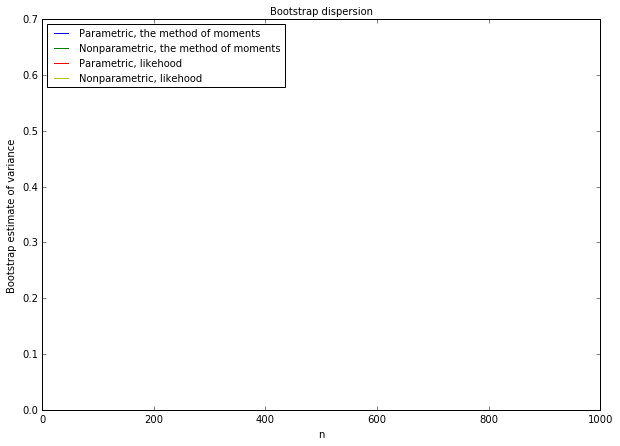

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.0
Nonparametric, the method of moments:  0.0
Parametric, likehood:  0.0
Nonparametric, likehood:  0.0
  
График выборочных дисперсий для параметра  1


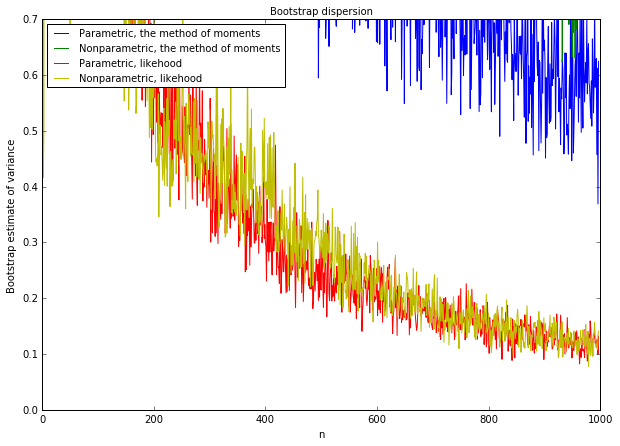

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.624492881083
Nonparametric, the method of moments:  0.976030285895
Parametric, likehood:  0.13231272633
Nonparametric, likehood:  0.141362934693
  


In [115]:
# alpha = 1, gamma = 10 = 1 / scale
# В библиотеке распределение определено так: gamma.pdf(x, a) = x**(a-1) * exp(-x) / gamma(a)
solve_task( theta = (1.0, 10.0), destribution = (lambda N, theta: stats.gamma.rvs(a = theta[0] , size = N, scale = 1.0 / theta[1])),
            moment_evaluation = (lambda x: (stats.moment(x,2) / np.var(x), np.average(x) / np.var(x))),
             credibility_evaluation = (lambda x: (1, 1. / np.average(x))), ylim=0.7)

### Равномерное распределение R[a, b]

Метод моментов: $a^* = \bar x - \sqrt{3s^2}, b^* = \bar x + \sqrt{3s^2}$.
Метод максимального правдоподобия: $a^* = \min(x), b^* = \max(x)$

График выборочных дисперсий для параметра  0


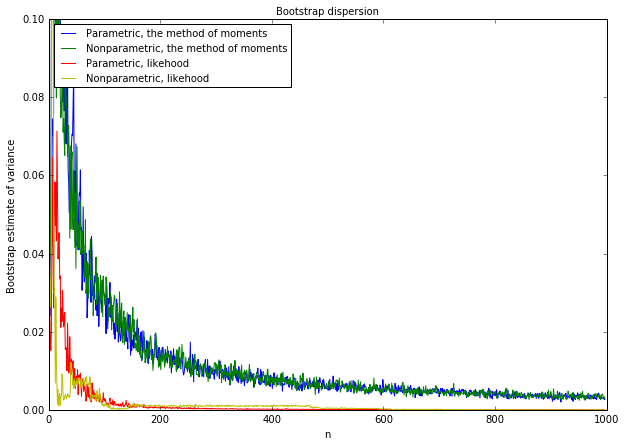

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.00276306249001
Nonparametric, the method of moments:  0.002808440924
Parametric, likehood:  1.26940643459e-05
Nonparametric, likehood:  1.33395528632e-05
  
График выборочных дисперсий для параметра  1


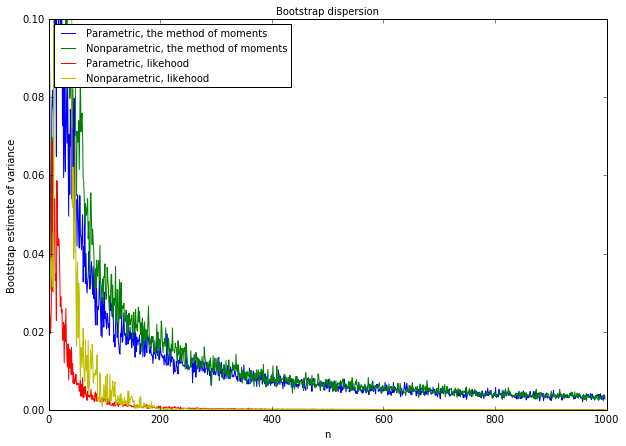

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.00276368300947
Nonparametric, the method of moments:  0.003487323418
Parametric, likehood:  3.16833531108e-05
Nonparametric, likehood:  9.01518101867e-06
  


In [110]:
# a = 0, b = 5
solve_task(theta = (0.0, 5.0), destribution = (lambda N, theta: stats.uniform.rvs(loc = theta[0] , size = N, 
                                                                                  scale = theta[1] - theta[0])),
             moment_evaluation = (lambda x: (np.average(x) - np.sqrt(3 * np.var(x)), np.average(x) + np.sqrt(3 * np.var(x)))),
             credibility_evaluation = (lambda x: (np.min(x), np.max(x))), ylim=0.1)

График выборочных дисперсий для параметра  0


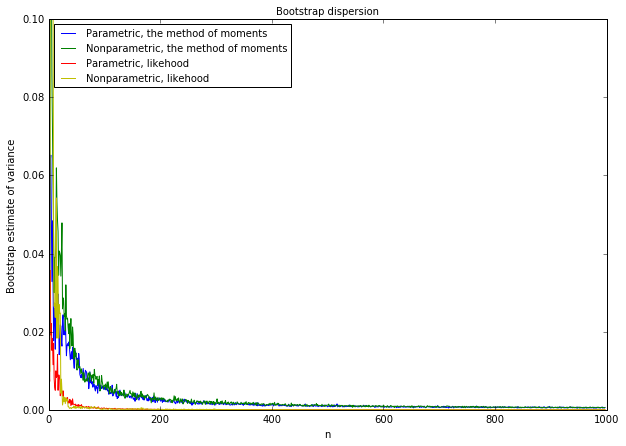

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.000563983544803
Nonparametric, the method of moments:  0.000573052726182
Parametric, likehood:  4.58370274849e-06
Nonparametric, likehood:  1.6194842214e-06
  
График выборочных дисперсий для параметра  1


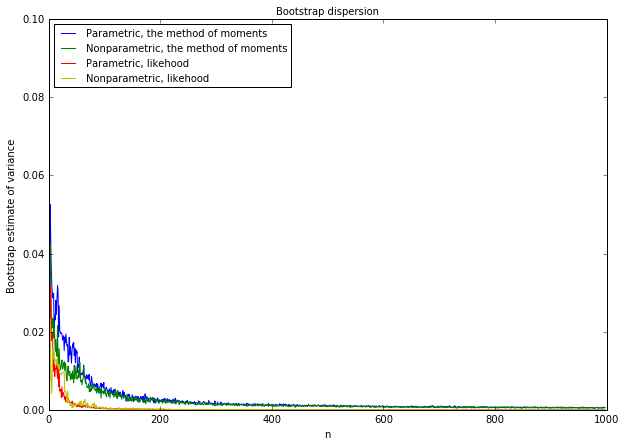

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.000581466500711
Nonparametric, the method of moments:  0.000507367006885
Parametric, likehood:  4.04388946082e-06
Nonparametric, likehood:  1.78743827813e-05
  


In [111]:
# a = -1, b = 1
solve_task(theta = (-1.0, 1.0), destribution = (lambda N, theta: stats.uniform.rvs(loc = theta[0] , size = N, 
                                                                                  scale = theta[1] - theta[0])),
             moment_evaluation = (lambda x: (np.average(x) - np.sqrt(3 * np.var(x)), np.average(x) + np.sqrt(3 * np.var(x)))),
             credibility_evaluation = (lambda x: (np.min(x), np.max(x))), ylim=0.1)

График выборочных дисперсий для параметра  0


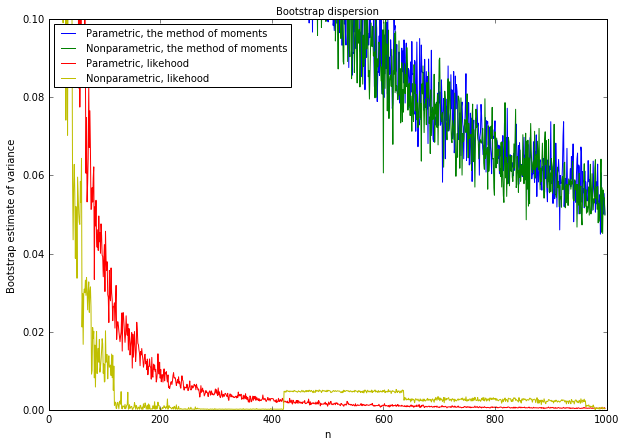

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.0500573238112
Nonparametric, the method of moments:  0.0498413307802
Parametric, likehood:  0.000302499711023
Nonparametric, likehood:  0.000412510669067
  
График выборочных дисперсий для параметра  1


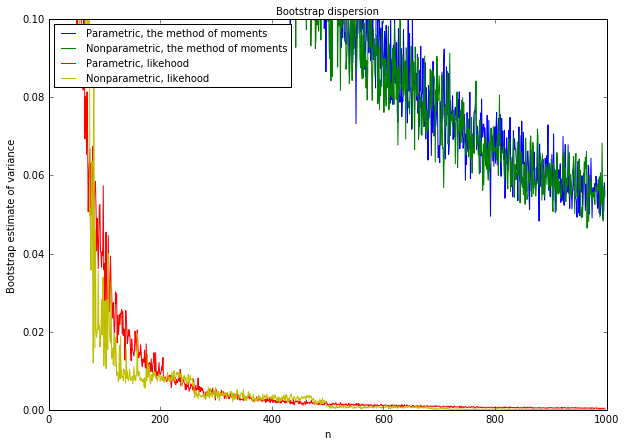

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.0552262590663
Nonparametric, the method of moments:  0.0544874528595
Parametric, likehood:  0.000372419376926
Nonparametric, likehood:  4.52777944612e-05
  


In [112]:
# a = 0, b = 20
solve_task(K=300, theta = (0.0, 20.0), destribution = (lambda N, theta: stats.uniform.rvs(loc = theta[0] , size = N, 
                                                                                  scale = theta[1] - theta[0])),
             moment_evaluation = (lambda x: (np.average(x) - np.sqrt(3 * np.var(x)), np.average(x) + np.sqrt(3 * np.var(x)))),
             credibility_evaluation = (lambda x: (np.min(x), np.max(x))),ylim=0.1)

### Пуассоновское распределение $Pois(\lambda)$.

Метод моментов и метод максимального правдоподобия: $\lambda ^ * = \bar X$

График выборочных дисперсий для параметра  0


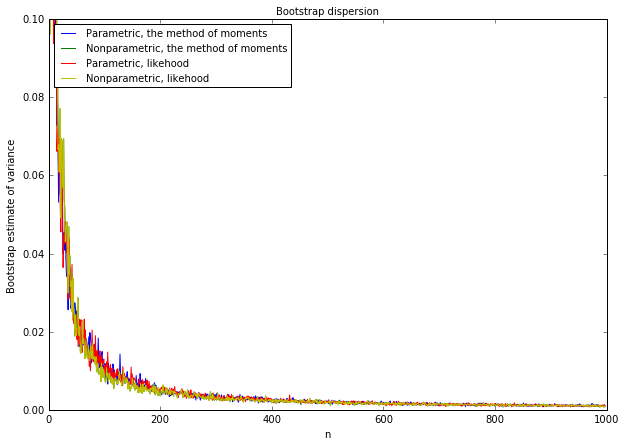

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.00112747382017
Nonparametric, the method of moments:  0.000870361753145
Parametric, likehood:  0.000778828478128
Nonparametric, likehood:  0.000870361753145
  


In [113]:
# lambda = 1
solve_task(theta = [1.0], destribution = (lambda N, theta: stats.poisson.rvs(mu=theta[0] , size=N)),
             moment_evaluation = (lambda x: (np.average(x),)),
             credibility_evaluation = (lambda x: (np.average(x),)), ylim=0.1)

График выборочных дисперсий для параметра  0


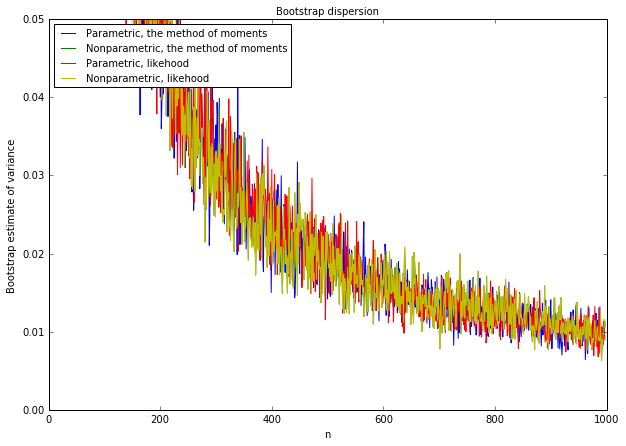

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.0112729886042
Nonparametric, the method of moments:  0.0106353179005
Parametric, likehood:  0.00896215695175
Nonparametric, likehood:  0.0106353179005
  


In [119]:
# lambda = 10
solve_task(theta = [10.0], destribution = (lambda N, theta: stats.poisson.rvs(mu=theta[0] , size=N)),
             moment_evaluation = (lambda x: (np.average(x),)),
             credibility_evaluation = (lambda x: (np.average(x),)), ylim=0.05)

График выборочных дисперсий для параметра  0


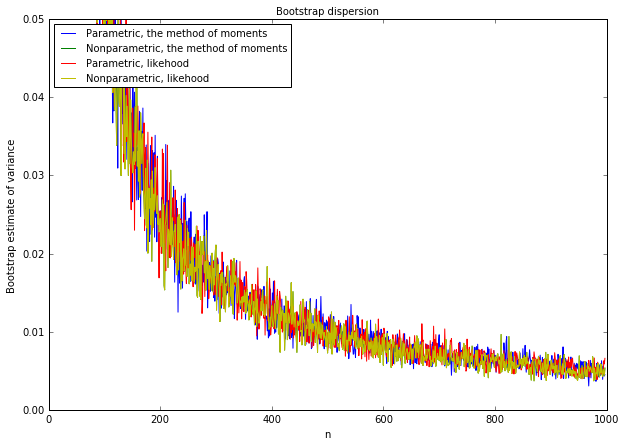

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.00450294649003
Nonparametric, the method of moments:  0.00533793964134
Parametric, likehood:  0.00658452005559
Nonparametric, likehood:  0.00533793964134
  


In [122]:
# lambda = 5
solve_task(theta = [5.0], destribution = (lambda N, theta: stats.poisson.rvs(mu=theta[0] , size=N)),
             moment_evaluation = (lambda x: (np.average(x),)),
             credibility_evaluation = (lambda x: (np.average(x),)), ylim=0.05)

#### Биномиальное распределение: Bin(n, p),  n = 100.

Метод моментов: $p^* = 1 - {s^2 \over {\bar X}}$, $n^* = \frac{\bar{X}}{1 - \frac{s^2}{\bar{X}}}$.

Метод максимального правдоподобия: $p^* = {\bar X \over n}$, при фиксированном n.

График выборочных дисперсий для параметра  0


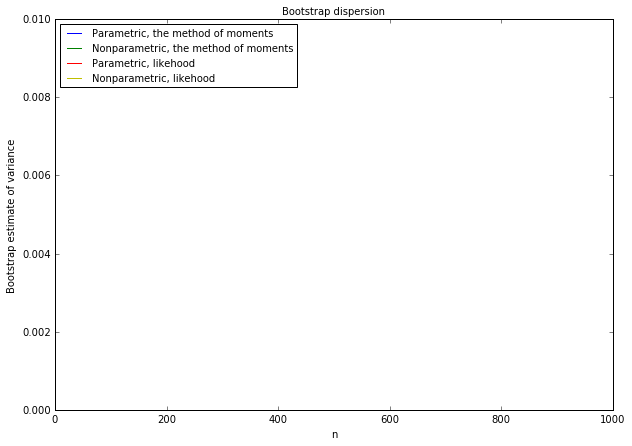

Variance estimates on the N-th step: 
Parametric, the method of moments:  32.6501626185
Nonparametric, the method of moments:  33.6257750021
Parametric, likehood:  0.0
Nonparametric, likehood:  0.0
  
График выборочных дисперсий для параметра  1


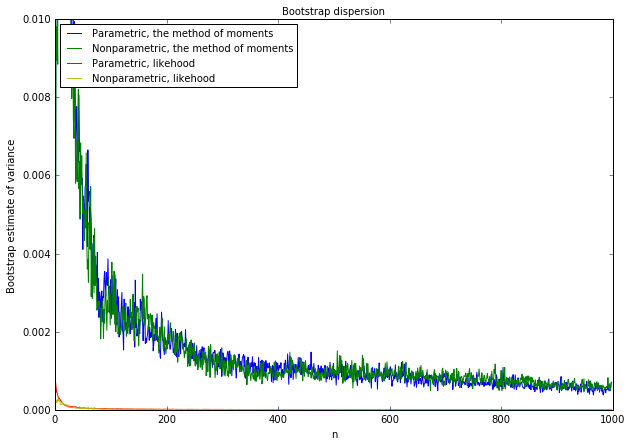

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.000694594533982
Nonparametric, the method of moments:  0.00070634185343
Parametric, likehood:  2.3010069529e-06
Nonparametric, likehood:  2.01358206054e-06
  


In [140]:
# n=100, p = 0.5.
solve_task(K=100, theta=(100, 0.5), destribution = (lambda N, theta: stats.binom.rvs(n=theta[0],p=theta[1] , size=N)),
             moment_evaluation = (lambda x: (np.average(x) / (1 - np.var(x) / np.average(x)), 
                                             1 - np.var(x) / np.average(x))),
             credibility_evaluation = (lambda x: (100, np.average(x) / 100)), ylim=0.01)

График выборочных дисперсий для параметра  0


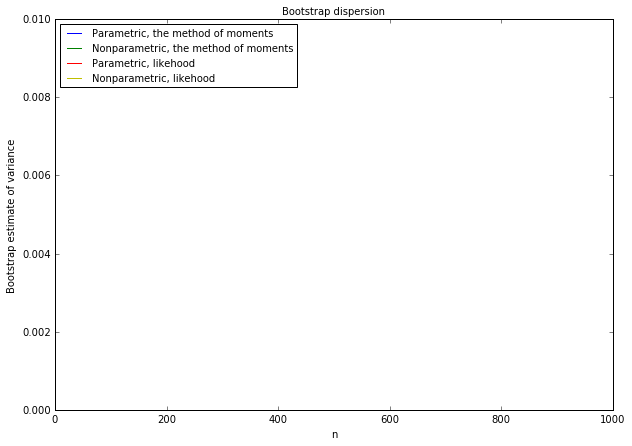

Variance estimates on the N-th step: 
Parametric, the method of moments:  3249.12369878
Nonparametric, the method of moments:  2606.55850494
Parametric, likehood:  0.0
Nonparametric, likehood:  0.0
  
График выборочных дисперсий для параметра  1


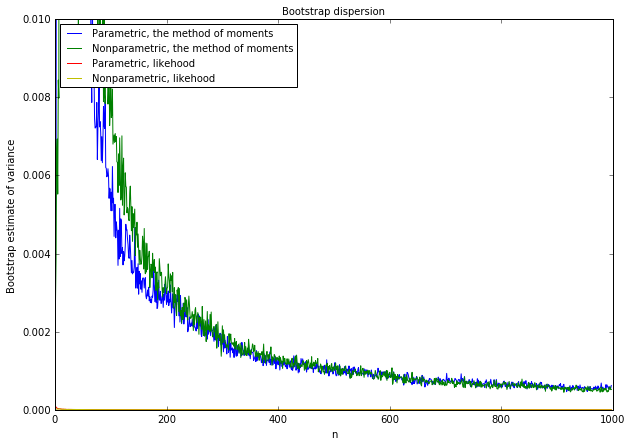

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.000622509626034
Nonparametric, the method of moments:  0.000519448529544
Parametric, likehood:  2.66825062589e-07
Nonparametric, likehood:  2.54527857576e-07
  


In [141]:
# n=100, p = 0.5.
solve_task(K=300, theta=(1000, 0.5), destribution = (lambda N, theta: stats.binom.rvs(n=theta[0],p=theta[1] , size=N)),
             moment_evaluation = (lambda x: (np.average(x) / (1 - np.var(x) / np.average(x)), 
                                             1 - np.var(x) / np.average(x))),
             credibility_evaluation = (lambda x: (1000, np.average(x) / 1000)), ylim=0.01)

График выборочных дисперсий для параметра  0


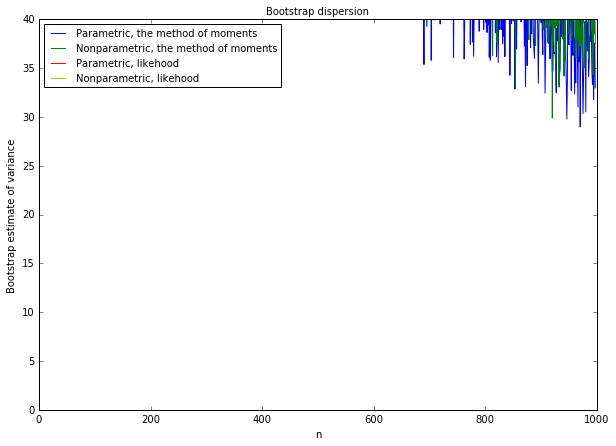

Variance estimates on the N-th step: 
Parametric, the method of moments:  32.96653632
Nonparametric, the method of moments:  37.5173651598
Parametric, likehood:  0.0
Nonparametric, likehood:  0.0
  
График выборочных дисперсий для параметра  1


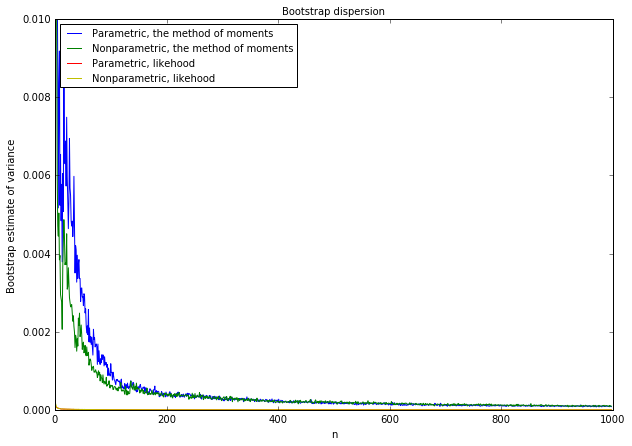

Variance estimates on the N-th step: 
Parametric, the method of moments:  8.15372595959e-05
Nonparametric, the method of moments:  8.98127873881e-05
Parametric, likehood:  3.39611100089e-07
Nonparametric, likehood:  2.87228071315e-07
  


In [10]:
# n=200, p = 0.8.
solve_task(K=200, theta=(500, 0.8), destribution = (lambda N, theta: stats.binom.rvs(n=theta[0],p=theta[1] , size=N)),
             moment_evaluation = (lambda x: (np.average(x) / (1 - np.var(x) / np.average(x)), 
                                             1 - np.var(x) / np.average(x))),
             credibility_evaluation = (lambda x: (500, np.average(x) / 500)), ylim=[40.0, 0.01])

### Геометрическое распределение $Geom(p)$

Метод моментов: $p^* = {\bar x \over s^2}$ 

Метод максимального правдоподобия: $p^* = \frac{1}{1 + \bar x}$

График выборочных дисперсий для параметра  0


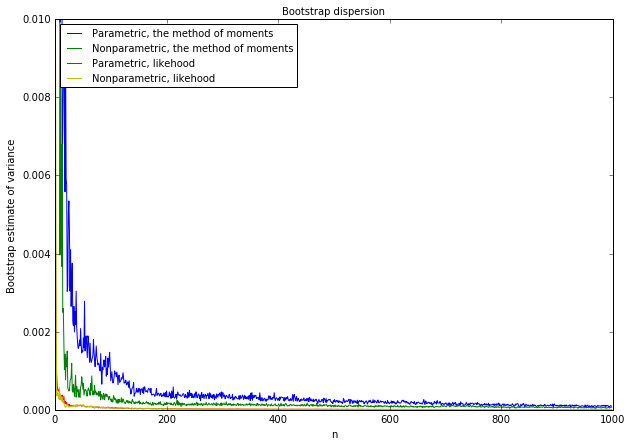

Variance estimates on the N-th step: 
Parametric, the method of moments:  9.18324075309e-05
Nonparametric, the method of moments:  5.79734529628e-05
Parametric, likehood:  5.56562951857e-06
Nonparametric, likehood:  6.73490187747e-06
  


In [10]:
# p = 0.1
solve_task(K=100, theta = [0.1], destribution = (lambda N, theta: stats.geom.rvs(p=theta[0] , size=N)),
             moment_evaluation = (lambda x: (np.average(x) / np.var(x),)),
             credibility_evaluation = (lambda x: (1 / (1 + np.average(x)),)), ylim=0.01)

График выборочных дисперсий для параметра  0


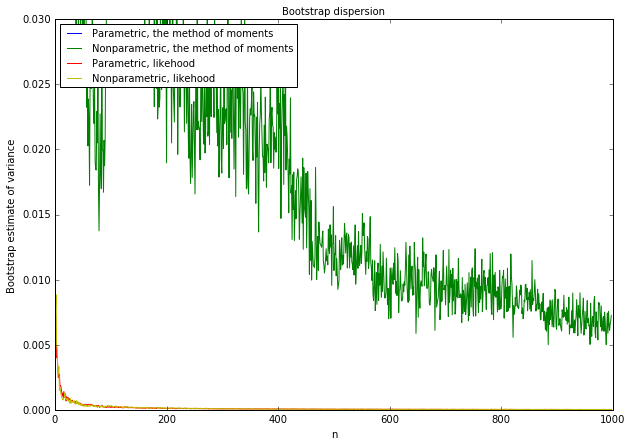

Variance estimates on the N-th step: 
Parametric, the method of moments:  nan
Nonparametric, the method of moments:  0.00724284375138
Parametric, likehood:  2.50432014769e-05
Nonparametric, likehood:  2.57588454881e-05
  


In [14]:
# p = 0.5, по непонятным мне причинам просто theta[0], как аргумент rvs не принимается.
solve_task(theta = [0.5], destribution = (lambda N, theta: stats.geom.rvs(min(1., max(0., theta[0])), size = N)),
             moment_evaluation = (lambda x: (np.average(x) / np.var(x),)),
             credibility_evaluation = (lambda x: (1. / (1. + np.average(x)),)), ylim=0.03)

График выборочных дисперсий для параметра  0


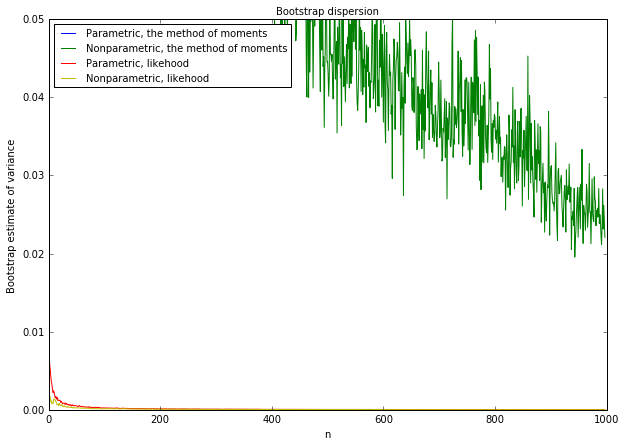

Variance estimates on the N-th step: 
Parametric, the method of moments:  nan
Nonparametric, the method of moments:  0.0220696724737
Parametric, likehood:  2.55844071216e-05
Nonparametric, likehood:  1.85041304233e-05
  


In [19]:
# p = 0.7
solve_task(K=200, theta = [0.7], destribution = (lambda N, theta: stats.geom.rvs(min(1., max(0., theta[0])), size = N)),
             moment_evaluation = (lambda x: (np.average(x) / np.var(x),)),
             credibility_evaluation = (lambda x: (1. / (1. + np.average(x)),)), ylim=0.05)

### Бета распределение: Beta(a,b).
Только метод моментов: $a^* = \frac{\bar{X^2} - \bar{X}}{-s^2}\bar{X}$, $b^* = \frac{\bar{X^2} - \bar{X}}{-s^2}(1 - \bar{X})$

График выборочных дисперсий для параметра  0


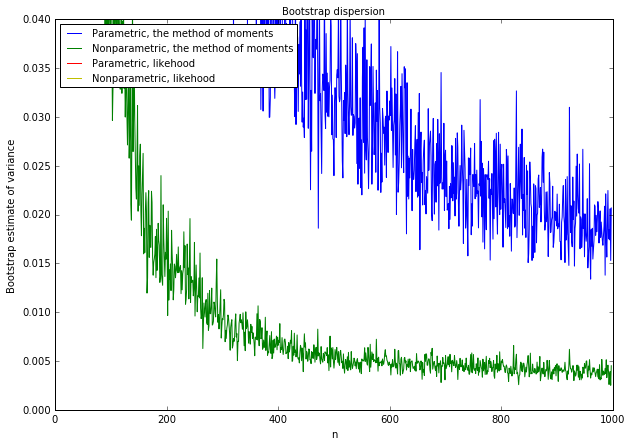

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.0206683558313
Nonparametric, the method of moments:  0.0045116805828
Parametric, likehood:  0.0
Nonparametric, likehood:  0.0
  
График выборочных дисперсий для параметра  1


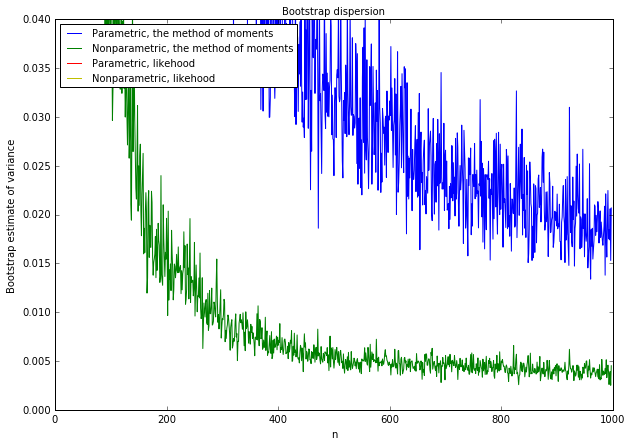

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.0206683558313
Nonparametric, the method of moments:  0.0045116805828
Parametric, likehood:  0.0
Nonparametric, likehood:  0.0
  


In [22]:
# a=1, b = 10.
solve_task( theta=(1., 10.), destribution = (lambda N, theta: stats.beta.rvs(a=theta[0],b=theta[1] , size=N)),
             moment_evaluation = (lambda x: ((stats.moment(x,2) - np.average(x)) * np.average(x) * -1. / np.var(x), 
                                            (stats.moment(x,2) - np.average(x)) * -1. * np.average(x) / np.var(x))),
             credibility_evaluation = (lambda x: (1.,10.)),ylim = 0.04)

График выборочных дисперсий для параметра  0


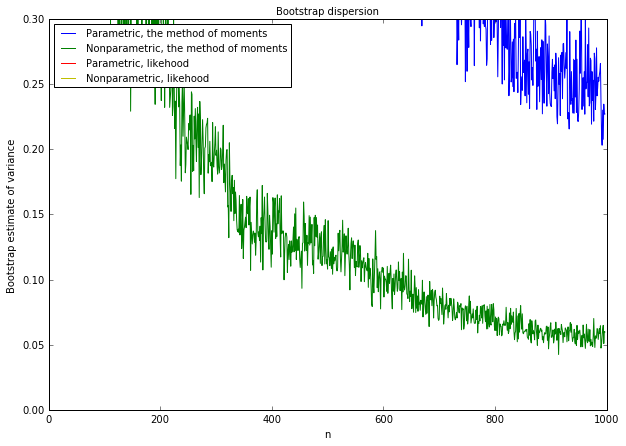

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.227220292112
Nonparametric, the method of moments:  0.0597262454213
Parametric, likehood:  0.0
Nonparametric, likehood:  0.0
  
График выборочных дисперсий для параметра  1


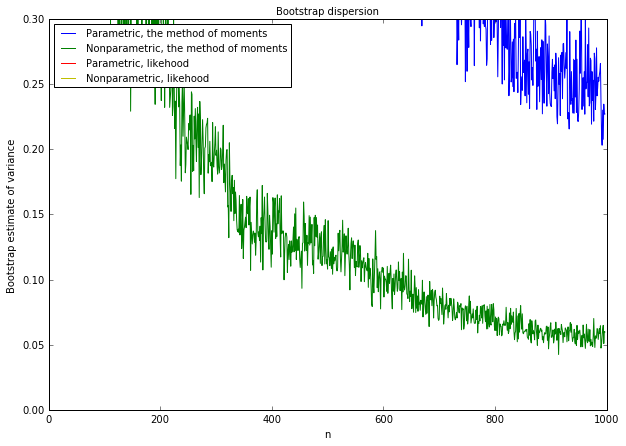

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.227220292112
Nonparametric, the method of moments:  0.0597262454213
Parametric, likehood:  0.0
Nonparametric, likehood:  0.0
  


In [8]:
# a=3, b = 5.
solve_task(K=200, theta=(3., 5.), destribution = (lambda N, theta: stats.beta.rvs(a=theta[0],b=theta[1] , size=N)),
             moment_evaluation = (lambda x: ((stats.moment(x,2) - np.average(x)) * np.average(x) * -1. / np.var(x), 
                                            (stats.moment(x,2) - np.average(x)) * -1. * np.average(x) / np.var(x))),
             credibility_evaluation = (lambda x: (3.,5.)), ylim = 0.3)

График выборочных дисперсий для параметра  0


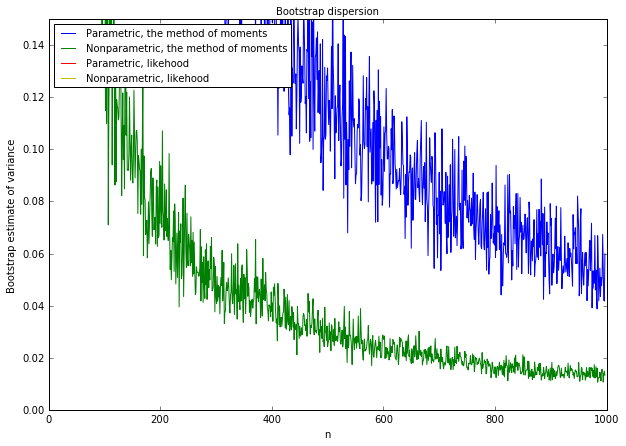

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.059836042557
Nonparametric, the method of moments:  0.0133197905397
Parametric, likehood:  0.0
Nonparametric, likehood:  0.0
  
График выборочных дисперсий для параметра  1


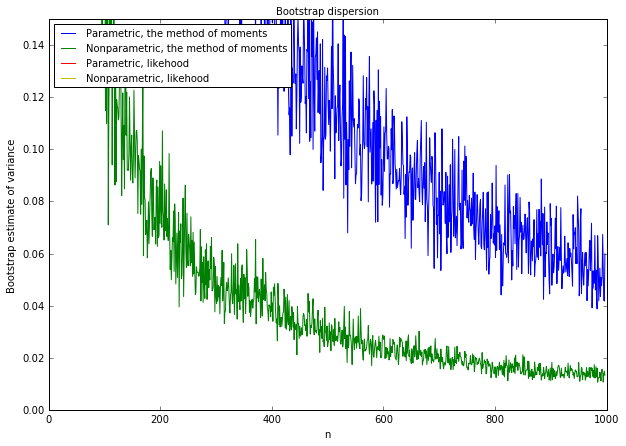

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.059836042557
Nonparametric, the method of moments:  0.0133197905397
Parametric, likehood:  0.0
Nonparametric, likehood:  0.0
  


In [26]:
# a=1, b = 1.
solve_task( theta=(1., 1.), destribution = (lambda N, theta: stats.beta.rvs(a=theta[0],b=theta[1] , size=N)),
             moment_evaluation = (lambda x: ((stats.moment(x,2) - np.average(x)) * np.average(x) * -1. / np.var(x), 
                                            (stats.moment(x,2) - np.average(x)) * -1. * np.average(x) / np.var(x))),
             credibility_evaluation = (lambda x: (1.,1.)),ylim = 0.15)

### Распределение Парето с плотностью $p(x) = \gamma x^{-\gamma - 1} I(x > 1)$ 
Оценка только методом моментов: $\gamma * = \frac{\bar{(\frac{1}{X})}}{1 - \bar{(\frac{1}{X})}}$.


График выборочных дисперсий для параметра  0


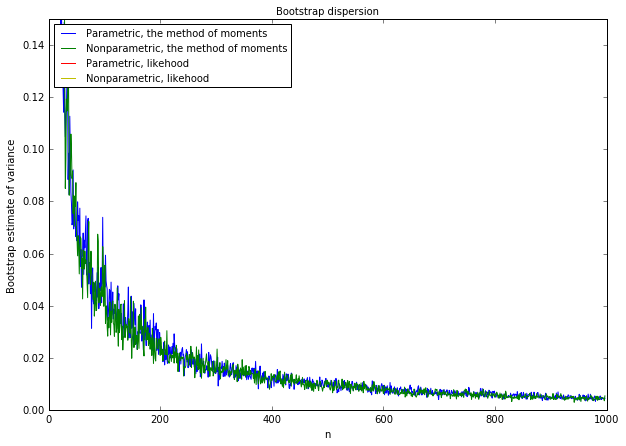

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.00427230229636
Nonparametric, the method of moments:  0.00534379723351
Parametric, likehood:  0.0
Nonparametric, likehood:  0.0
  


In [13]:
# gamma = 2.0
solve_task(theta = [2.0], destribution = (lambda N, theta: stats.pareto.rvs(b=theta[0] , size=N)),
             moment_evaluation = (lambda x: ( np.average(1. / np.array(x)) / (1. - np.average(1. / np.array(x))),)),
             credibility_evaluation = (lambda x: (2.0,)), ylim=0.15)


График выборочных дисперсий для параметра  0


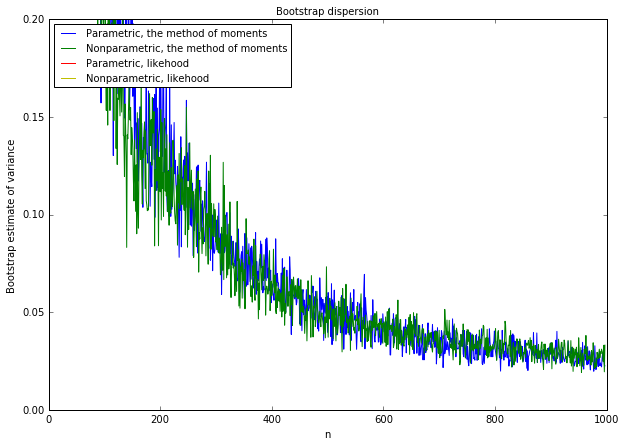

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.0225032398317
Nonparametric, the method of moments:  0.0331031750399
Parametric, likehood:  0.0
Nonparametric, likehood:  0.0
  


In [14]:
# gamma = 5.0
solve_task(theta = [5.0], destribution = (lambda N, theta: stats.pareto.rvs(b=theta[0] , size=N)),
             moment_evaluation = (lambda x: ( np.average(1. / np.array(x)) / (1. - np.average(1. / np.array(x))),)),
             credibility_evaluation = (lambda x: (5.0,)), ylim=0.2)

График выборочных дисперсий для параметра  0


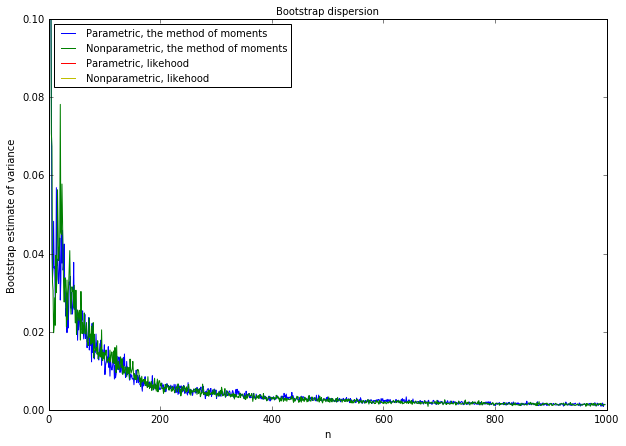

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.00136927941551
Nonparametric, the method of moments:  0.001314232026
Parametric, likehood:  0.0
Nonparametric, likehood:  0.0
  


In [15]:
# gamma = 1.0
solve_task(theta = [1.0], destribution = (lambda N, theta: stats.pareto.rvs(b=theta[0] , size=N)),
             moment_evaluation = (lambda x: ( np.average(1. / np.array(x)) / (1. - np.average(1. / np.array(x))),)),
             credibility_evaluation = (lambda x: (1.0,)), ylim=0.1)

### Распределение Коши. Cauchy($\theta$), $p(x) = \frac{\theta}{\pi(x^2 + \theta^2)}$

### Оценка, только методом моментов: $\theta* = \frac{1}{tg(\pi \overline{I(x\in [0,1])} )}$

$\theta$ = scale в scypy.stats.cauchy

График выборочных дисперсий для параметра  0


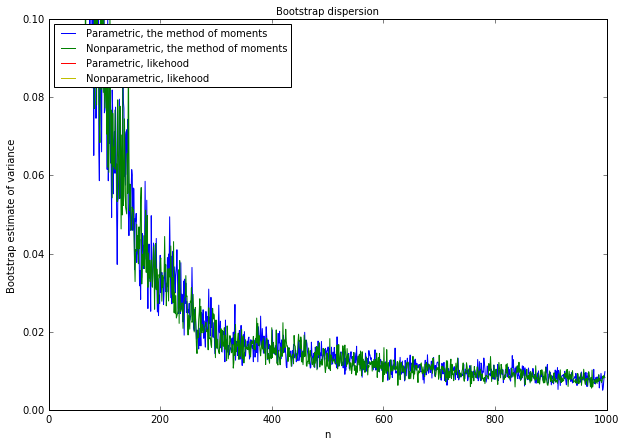

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.00976080558343
Nonparametric, the method of moments:  0.00824947145508
Parametric, likehood:  0.0
Nonparametric, likehood:  0.0
  


In [32]:
# theta = 1.0
solve_task(theta = [1.0], destribution = (lambda N, theta: stats.cauchy.rvs(scale=theta[0] , size=N)),
             moment_evaluation = (lambda x: ( 1. / np.tan(np.pi * np.average([float(i >= 0 and i <= 1) for i in x])),)),
             credibility_evaluation = (lambda x: (1.0,)), ylim=0.1)

График выборочных дисперсий для параметра  0


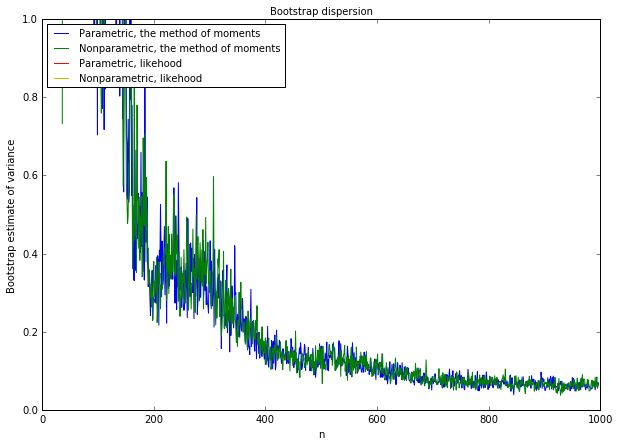

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.0654637095278
Nonparametric, the method of moments:  0.0665177275788
Parametric, likehood:  0.0
Nonparametric, likehood:  0.0
  


In [38]:
# theta = 3.0
solve_task(theta = [3.0], destribution = (lambda N, theta: stats.cauchy.rvs(scale=theta[0] , size=N)),
             moment_evaluation = (lambda x: ( 1. / np.tan(np.pi * np.average([float(i >= 0 and i <= 1) for i in x])),)),
             credibility_evaluation = (lambda x: (3.0,)), ylim=1.0)

График выборочных дисперсий для параметра  0


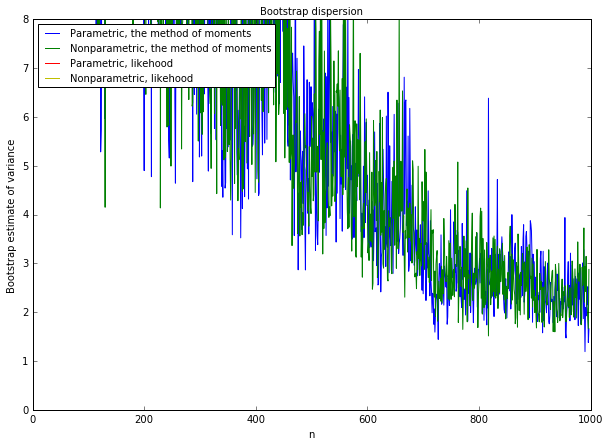

Variance estimates on the N-th step: 
Parametric, the method of moments:  1.65906924419
Nonparametric, the method of moments:  2.87520927233
Parametric, likehood:  0.0
Nonparametric, likehood:  0.0
  


In [39]:
# theta = 7.0
solve_task(theta = [7.0], destribution = (lambda N, theta: stats.cauchy.rvs(scale=theta[0] , size=N)),
             moment_evaluation = (lambda x: ( 1. / np.tan(np.pi * np.average([float(i >= 0 and i <= 1) for i in x])),)),
             credibility_evaluation = (lambda x: (7.0,)), ylim=8.)

### Для распределения с плотностью $p_{\alpha,\beta}(x) = \frac{1}{\alpha} e^{\frac{\beta - x}{\alpha}} I_{[\beta, +\infty]}(x) $.

Только метод максимального правдоподобия: $\alpha^* = \bar{X} - X_{(1)} \geq 0, \beta^* = X_{(1)}$

Сделаем наше распределение с помощью экспоненциального из scipy.stats

График выборочных дисперсий для параметра  0


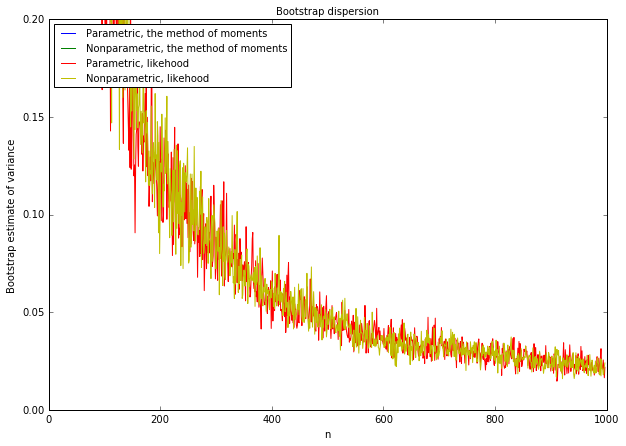

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.0
Nonparametric, the method of moments:  0.0
Parametric, likehood:  0.0217945832259
Nonparametric, likehood:  0.0239753434932
  
График выборочных дисперсий для параметра  1


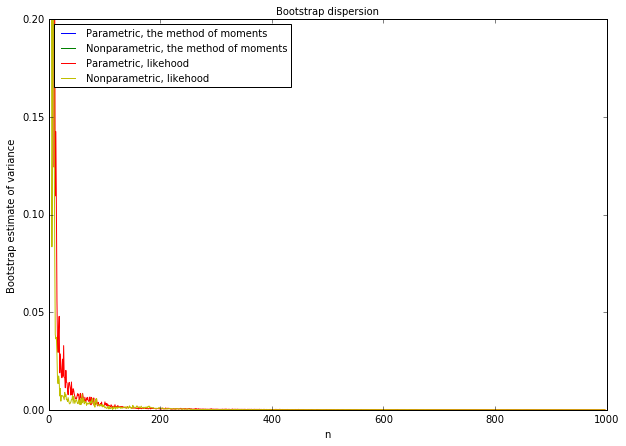

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.0
Nonparametric, the method of moments:  0.0
Parametric, likehood:  2.18960850075e-05
Nonparametric, likehood:  4.70387940558e-06
  


In [45]:
# alpha = 5.0, beta = 1.0
solve_task(theta = (5.0,1.0), destribution = (lambda N, theta: stats.expon.rvs(scale=theta[0], loc = theta[1], size=N)),
             moment_evaluation = (lambda x: (5.0,1.0)),
             credibility_evaluation = (lambda x: (np.average(x) - np.min(x),np.min(x))), ylim=0.2)

График выборочных дисперсий для параметра  0


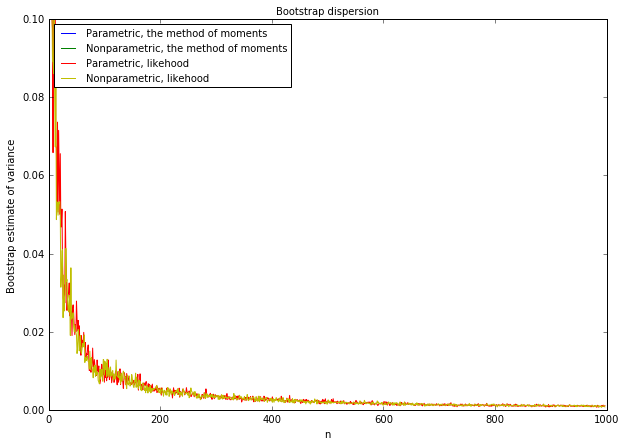

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.0
Nonparametric, the method of moments:  0.0
Parametric, likehood:  0.00104798469226
Nonparametric, likehood:  0.000737195799418
  
График выборочных дисперсий для параметра  1


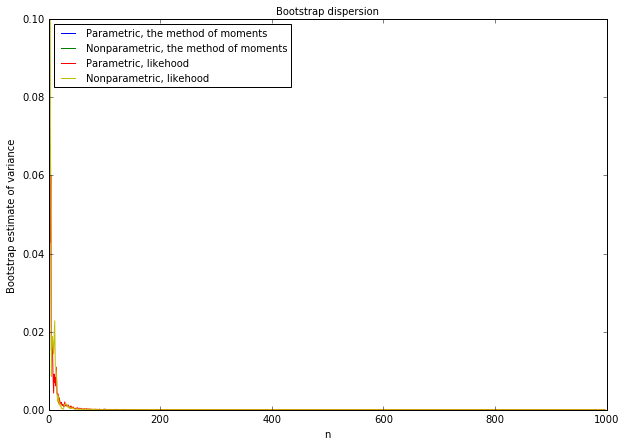

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.0
Nonparametric, the method of moments:  0.0
Parametric, likehood:  1.09049342916e-06
Nonparametric, likehood:  2.16529641126e-06
  


In [48]:
# alpha = 1.0, beta = 1.0
solve_task(theta = (1.0,1.0), destribution = (lambda N, theta: stats.expon.rvs(scale=theta[0], loc = theta[1], size=N)),
             moment_evaluation = (lambda x: (1.0,1.0)),
             credibility_evaluation = (lambda x: (np.average(x) - np.min(x),np.min(x))), ylim=0.1)

График выборочных дисперсий для параметра  0


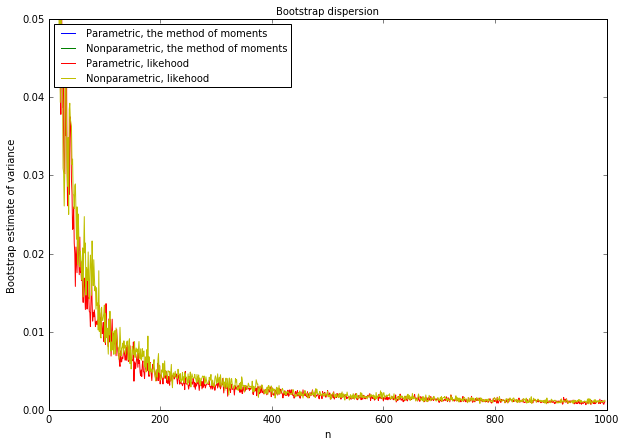

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.0
Nonparametric, the method of moments:  0.0
Parametric, likehood:  0.00102970061054
Nonparametric, likehood:  0.00121250376214
  
График выборочных дисперсий для параметра  1


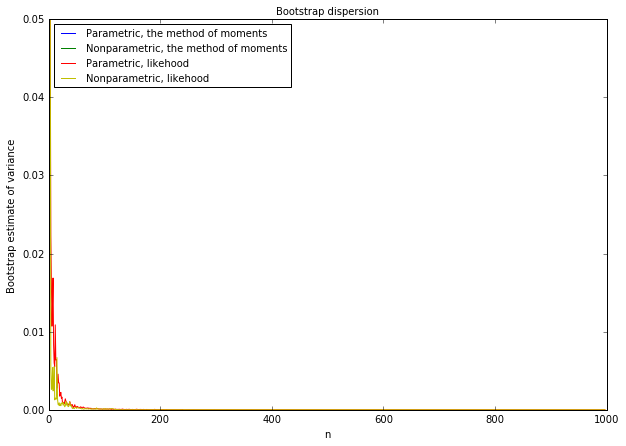

Variance estimates on the N-th step: 
Parametric, the method of moments:  0.0
Nonparametric, the method of moments:  0.0
Parametric, likehood:  1.09546728129e-06
Nonparametric, likehood:  3.91723936737e-07
  


In [49]:
# alpha = 1.0, beta = 2.0
solve_task(theta = (1.0,2.0), destribution = (lambda N, theta: stats.expon.rvs(scale=theta[0], loc = theta[1], size=N)),
             moment_evaluation = (lambda x: (1.0,2.0)),
             credibility_evaluation = (lambda x: (np.average(x) - np.min(x),np.min(x))), ylim=0.05)

### Вывод. Мы получили множество оценок дисперсий с помощью параметрического и непараметрического бутстрепа.
### Выпишем какие оценки для каких распределений получились наилучшими.
** Для нормального все способы, дают примерно одинаковые результаты, для $a$ и $\sigma^2$**

** Для гамма распределения наименьшая дисперсия достигается методом максимального правдоподобия при параметрическом бутстрепе. И в целом метод максимального правдоподобия для него получается лучше.**

** Для равномерного лучше метод максимального правдоподобия, особенно параметрический. **

** Для пуассоновского все оценки примерно одинаковыю **

** Для биномиального метод правдоподобия намного лучше, примерно одинаково при параметрическом и непараметрическом бутстрепе для оценки параметра $p$.**

** Для геометрического распределения метод максимального правдоподобия тоже лучше чем метод моментов.**

** Для бета распределения оценки методом правдоподобия нет, и лучшая оценка методом моментов с непараметрическим бутстрепом. **

** Для распределения Парето, обе оценки методом моментов примерно одинаковы, оценки методом макс. правдоподобия нет.**

** Для распределения Коши, обе оценки методом моментов  примерно одинаковы. **

**  Для распределения с плотностью $p_{\alpha,\beta}(x) = \frac{1}{\alpha} e^{\frac{\beta - x}{\alpha}} I_{[\beta, +\infty]}(x) $обе оценки методом максимального правдоподобия примерно одинаковы, оценки методом моментов нет **

** Общая тенденция такова, что если есть оценка методом максимального правдоподобия, то ее выборочная дисперсия сходится к 0 быстрее, чем методом моментов**

